In [0]:
#importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

############################################## LOADING DATASET #######################################################

# Load the fashion-mnist train data and test data
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


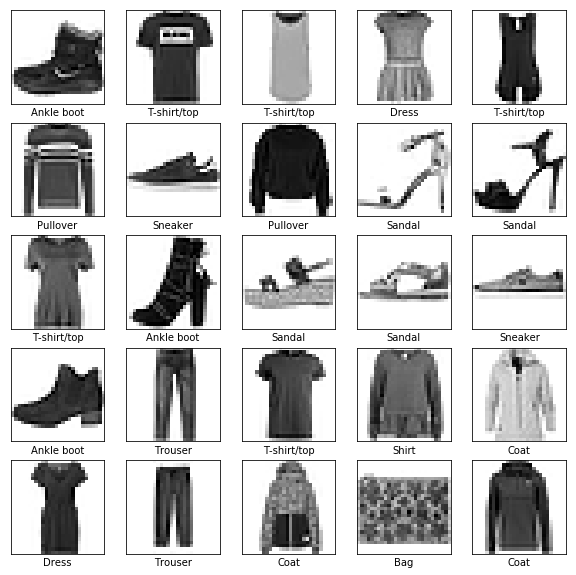

In [0]:
########################################## PLOTTING IMAGE OF EACH CATEGGORY ###############################################
#numbber of classes for classification
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#plotting image of each class
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


## **Without Using any Overfitting techniques**

55000 train set
5000 validation set
10000 test set
Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 18s 333us/sample - loss: 0.4670 - acc: 0.8270 - val_loss: 0.3630 - val_acc: 0.8658
Epoch 2/5
55000/55000 [==============================] - 19s 342us/sample - loss: 0.3482 - acc: 0.8703 - val_loss: 0.3149 - val_acc: 0.8816
Epoch 3/5
55000/55000 [==============================] - 19s 343us/sample - loss: 0.3116 - acc: 0.8819 - val_loss: 0.3161 - val_acc: 0.8770
Epoch 4/5
55000/55000 [==============================] - 19s 343us/sample - loss: 0.2854 - acc: 0.8916 - val_loss: 0.3044 - val_acc: 0.8826
Epoch 5/5
5000/5000 [==============================] - 0s 86us/sample - loss: 0.2991 - acc: 0.8896
Validation dataset loss:  0.29913818180561064 	 Accuracy:  0.8896
10000/10000 [==============================] - 1s 80us/sample - loss: 0.3302 - acc: 0.8765
Testing dataset loss:  0.3302322820067406 	 Accuracy:  0.8765


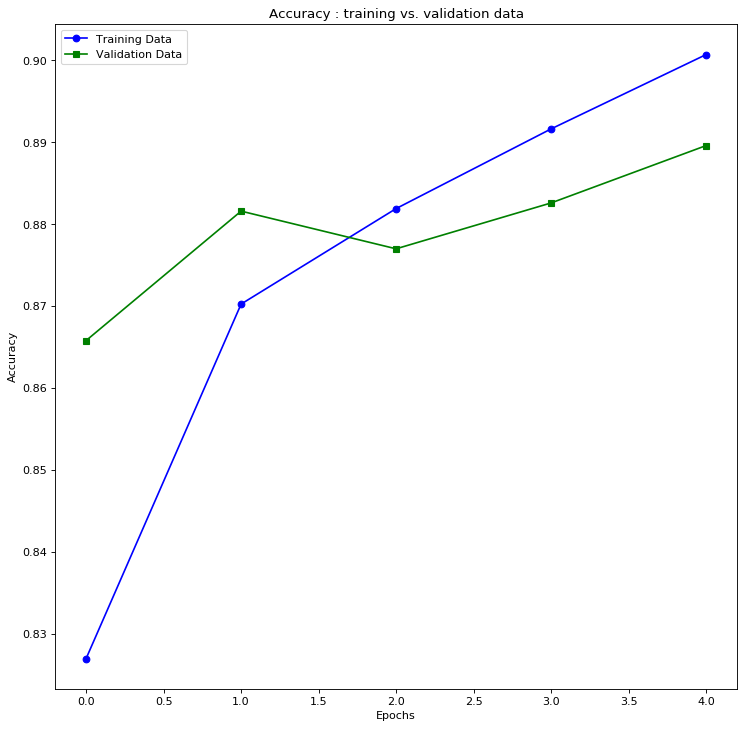

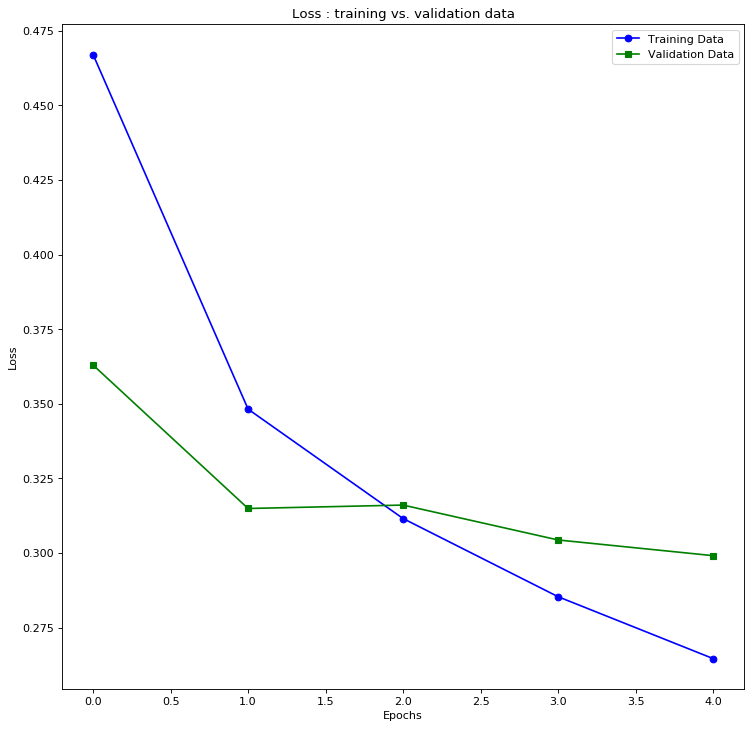

In [0]:
############################################## DATA PREPROCESSING #######################################################
# normalizing the data
x_train = tf.keras.utils.normalize(x_train,axis=1) 
x_test = tf.keras.utils.normalize(x_test,axis=1)

#Splitting training data into train / validation sets 
#put 5000 into validation set and keep remaining 55,000 for train
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')


############################################## BUILDING, TRAINING MODEL ###################################################
#building model using the basic feed forward Sequential model
model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(200, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#compiling model using adam as optimizr and loss function is category crossentropy
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics =['accuracy']  )

#training the model and storing in history object
historyObj=model.fit(x_train,y_train,epochs = 5,validation_data=(x_valid,y_valid))

#evaluating Validation dataset
valid_loss,valid_accuracy = model.evaluate(x_valid,y_valid)
print('Validation dataset loss: ',valid_loss,"\t Accuracy: ",valid_accuracy) 
#evaluating Testing dataset
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print('Testing dataset loss: ',test_loss,"\t Accuracy: ",test_accuracy) 

############################################## PLOTTING LOSS, ACCURACY ####################################################
#plotting the loss and accuracy of training and testing dataset using History object
plt.figure(figsize=(11, 11), dpi= 80)
plt.plot(historyObj.history['acc'], 'bo-', label = 'Training Data')
plt.plot(historyObj.history['val_acc'], 'gs-', label = 'Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy : training vs. validation data')
plt.legend()
plt.show()

plt.figure(figsize=(11, 11), dpi= 80)
plt.plot(historyObj.history['loss'], 'bo-', label = 'Training Data')
plt.plot(historyObj.history['val_loss'], 'gs-', label = 'Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss : training vs. validation data')
plt.legend()
plt.show()



## **Preventing Overfitting** 

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set
Train on 55000 samples, validate on 5000 samples
Epoch 1/7
54930/55000 [============================>.] - ETA: 0s - loss: 0.5328 - acc: 0.8023
Epoch 00001: val_acc improved from -inf to 0.86680, saving model to /content/drive/My Drive/DNNTensorflow/model.hdf5
55000/55000 [==============================] - 44s 799us/sample - loss: 0.5326 - acc: 0.8023 - val_loss: 0.3681 - val_acc: 0.8668
Epoch 2/7
54945/55000 [============================>.] - ETA: 0s - loss: 0.4162 - acc: 0.8468
Epoch 00002: val_acc improved from 0.86680 to 0.87380, saving model to /content/drive/My Drive/DNNTensorflow/model.hdf5
55000/55000 [==============================] - 43s 773us/sample - loss: 0.4163 - acc: 0.8467 - val_loss: 0.3479 - val_acc: 0.8738
Epoch 3/7
54975/55000 [============================>.] - ETA: 0s - loss: 0.3841 - acc: 0.8581
Epoch 00003: val_acc improved from 0.87380 to 0.88360, savin

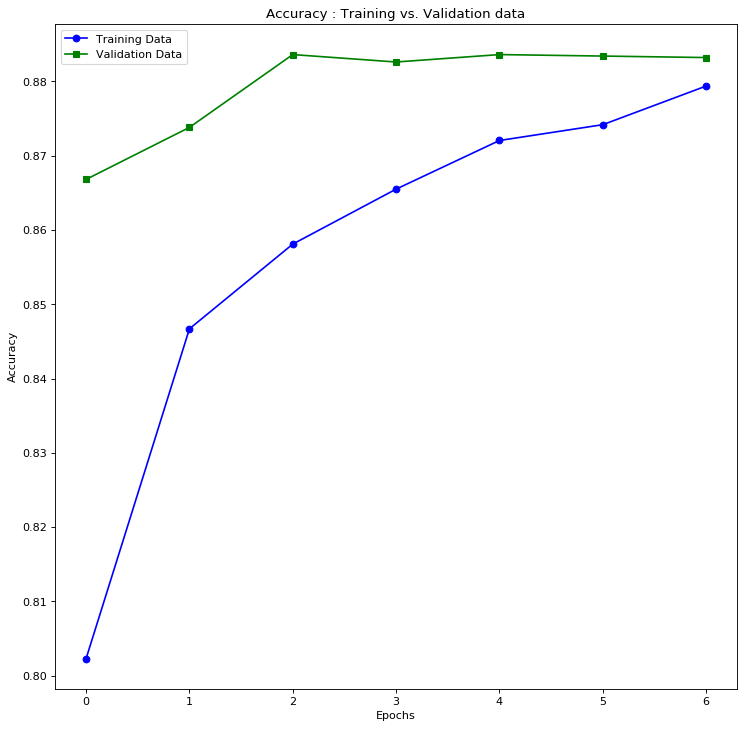

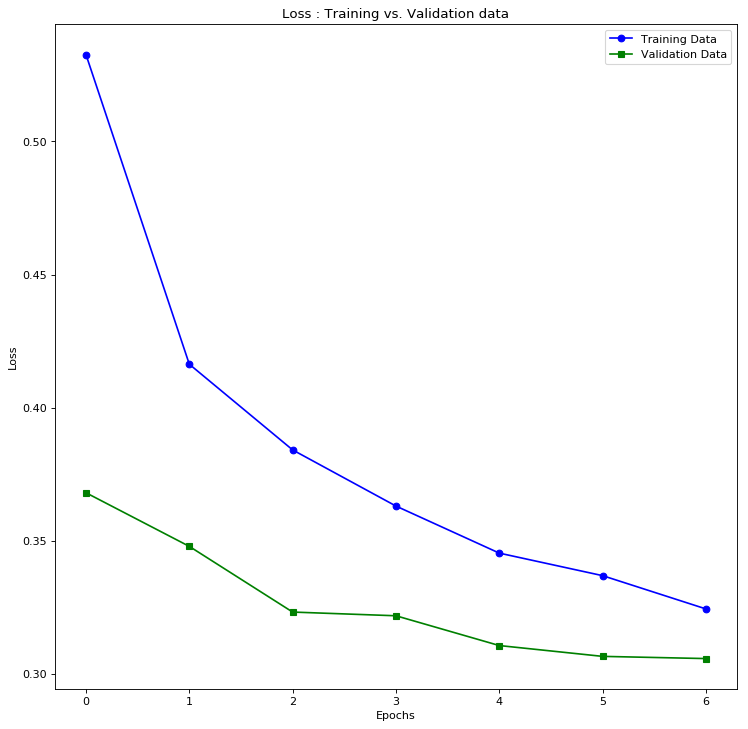

In [0]:
############################################## DATA PREPROCESSING #######################################################
#get data
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data() 
#normalizing data
x_train = tf.keras.utils.normalize(x_train,axis=1) 
x_test = tf.keras.utils.normalize(x_test,axis=1)

#Splitting data into train and validation sets 
# put 5000 into validation set and keep remaining 55,000 for train
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

############################################## BUILDING, TRAINING MODEL ###################################################
#building model using basic keras Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(200, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

#compiling model using adam as optimizer and loss as category crossentropy
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics =['accuracy'])

#path to save the model checkpoint
filepath="/DNNTensorflow/model.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#adding earlystopping and reducing learning rate by factor 0.1 after 3 epochs if no improvement in model by monitoring loss
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_delta=0.01)

#training the model and save the history
historyObj=model.fit(x_train,y_train,epochs = 7,validation_data=(x_valid,y_valid),batch_size=15,
                     callbacks=[early_stopping,checkpoint, reduce_lr])
#Evaluating training, validation and testing dataset
train_loss, train_accuracy = model.evaluate(x_train,y_train)
print('Training dataset loss: ',train_loss,"\t Accuracy: ",train_accuracy) #printing the validation cost and validation accuracy

val_loss, val_accuracy = model.evaluate(x_valid,y_valid)
print('Validation dataset loss: ',val_loss,"\t Accuracy: ",val_accuracy) #printing the validation cost and validation accuracy

test_loss, test_accuracy = model.evaluate(x_test,y_test)
print('Testing dataset loss: ',test_loss,"\t Accuracy: ",test_accuracy) #printing the validation cost and validation accuracy

############################################## PLOTTING LOSS, ACCURACY ####################################################
#plotting training and validation dataset loss and accuracy
plt.figure(figsize=(11, 11), dpi= 80)
plt.plot(historyObj.history['acc'], 'bo-', label = 'Training Data')
plt.plot(historyObj.history['val_acc'], 'gs-', label = 'Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy : Training vs. Validation data')
plt.legend()
plt.show()

plt.figure(figsize=(11, 11), dpi= 80)
plt.plot(historyObj.history['loss'], 'bo-', label = 'Training Data')
plt.plot(historyObj.history['val_loss'], 'gs-', label = 'Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss : Training vs. Validation data')
plt.legend()
plt.show()
